In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Explore fitnesses across generations

In [2]:
df_fitness = pd.read_csv("results/best_fitnesses.csv", header=None)
# drop last column of NaNs
df_fitness = df_fitness.drop(df_fitness.columns[len(df_fitness.columns)-1], axis=1)
# Add column names
columns = ["parallel_strategy"]
columns.extend(["gen_" + str(i) for i in range(0, 100)])
df_fitness.columns = columns


df_fitness.head()

,parallel_strategy,gen_0,gen_1,gen_2,gen_3,gen_4,gen_5,gen_6,gen_7,gen_8,...,gen_90,gen_91,gen_92,gen_93,gen_94,gen_95,gen_96,gen_97,gen_98,gen_99
0,sequential,4.466790e-07,4.554470e-07,4.646530e-07,4.766690e-07,4.870730e-07,5.005540e-07,5.025920e-07,5.105830e-07,5.208340e-07,...,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001
1,sequential,4.466790e-07,4.554470e-07,4.646530e-07,4.766690e-07,4.870730e-07,5.005540e-07,5.025920e-07,5.105830e-07,5.208340e-07,...,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001
2,threads1,4.466790e-07,4.554470e-07,4.646530e-07,4.766690e-07,4.870730e-07,5.005540e-07,5.025920e-07,5.105830e-07,5.208340e-07,...,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001
3,fastflow1,4.466790e-07,4.554470e-07,4.646530e-07,4.766690e-07,4.870730e-07,5.005540e-07,5.025920e-07,5.105830e-07,5.208340e-07,...,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001
4,threads2,4.440020e-07,4.582830e-07,4.821330e-07,4.860400e-07,4.933690e-07,4.984380e-07,5.121250e-07,5.168770e-07,5.349160e-07,...,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002


Plot of fitness across generation for Sequential strategy.

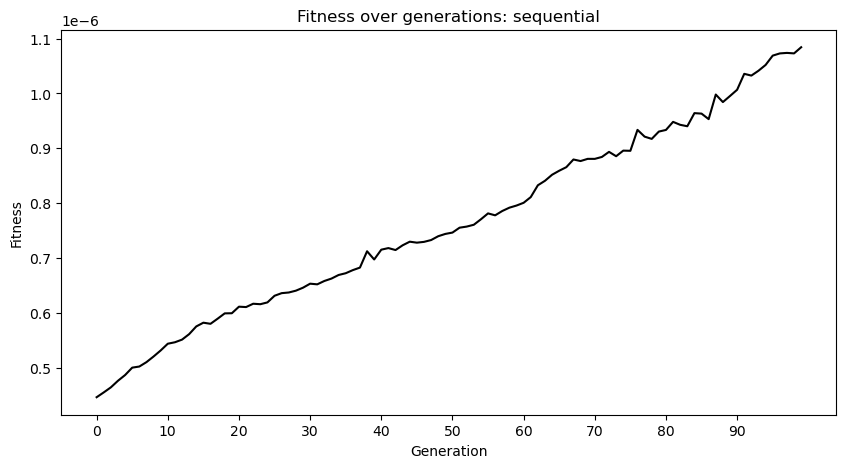

In [3]:
plt.figure(figsize=(10, 5))
plt.plot(df_fitness.iloc[1, 1:], color='black')
plt.title('Fitness over generations: ' + df_fitness.iloc[1, 0])
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.xticks(ticks=np.arange(0, 100, 10), labels=np.arange(0, 100, 10))
plt.show()


Plot of fitness across generation for Threads (32 workers) strategy.

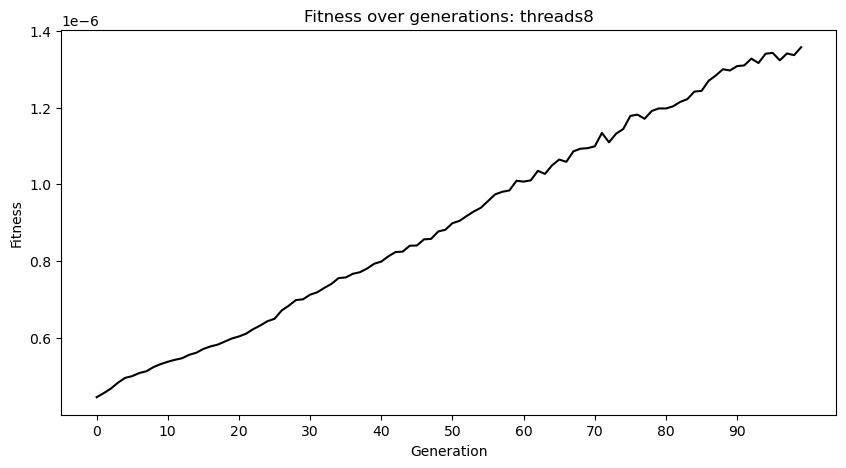

In [4]:
plt.figure(figsize=(10, 5))
plt.plot(df_fitness.iloc[10, 1:], color='black')
plt.title('Fitness over generations: ' + df_fitness.iloc[10, 0])
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.xticks(ticks=np.arange(0, 100, 10), labels=np.arange(0, 100, 10))
plt.show()

Plot of fitness across generation for Fastflow (32 workers) strategy.

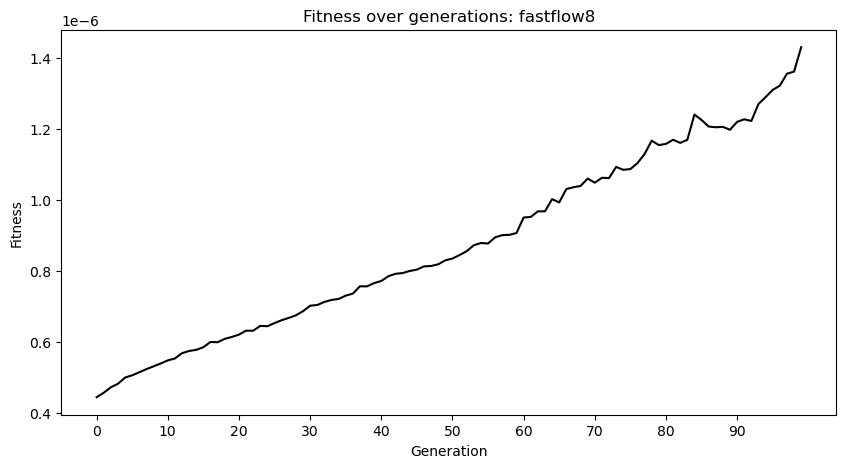

In [5]:
plt.figure(figsize=(10, 5))
plt.plot(df_fitness.iloc[11, 1:], color='black')
plt.title('Fitness over generations: ' + df_fitness.iloc[11, 0])
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.xticks(ticks=np.arange(0, 100, 10), labels=np.arange(0, 100, 10))
plt.show()

# Sequential and parallelizable parts of the program

In [6]:
df_sequential = pd.read_csv('results/sequential_results.csv')
df_sequential.head()

,maxFitness,totalTime,distanceTime,initializationTimeRandom,initializationTimeEmpty,evolutionTime,crossoverTime,mutationTime,fitnessTime
0,182307,291544652,21074,92121,5630,291290512,94559707,25572,5592751
1,182307,291116020,20702,90750,5204,290863821,0,0,0


In [7]:
# Calulate the column "otherTime" in the dataframe (totalTime - distanceTime - initializationTimeRandom - initializationTimeEmpty - evolutionTime)
df_sequential['otherTime'] = df_sequential['totalTime'] - df_sequential['distanceTime'] - df_sequential['initializationTimeRandom'] - df_sequential['initializationTimeEmpty'] - df_sequential['evolutionTime']

Pieplot over the times

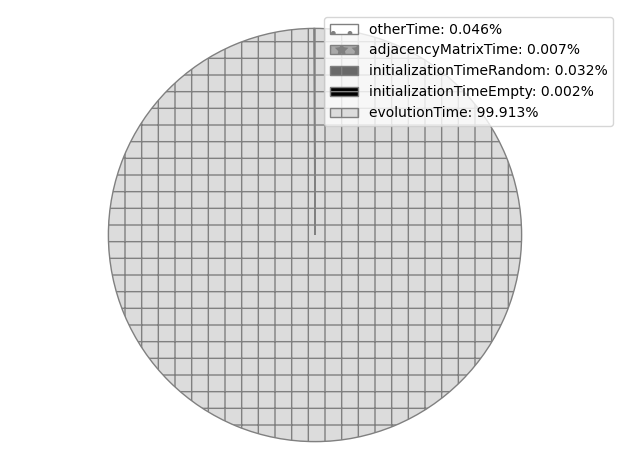

In [8]:
sizes = df_sequential[['otherTime', 'distanceTime', 'initializationTimeRandom', 'initializationTimeEmpty', 'evolutionTime']].iloc[0].values
# Normalize sizes in 0-100
sizes = sizes / sizes.sum() * 100
labels=['otherTime', 'adjacencyMatrixTime', 'initializationTimeRandom', 'initializationTimeEmpty', 'evolutionTime']
colors = ['white', 'darkgray', 'dimgray', 'black', 'gainsboro']

# Create a pie chart with textures
fig, ax = plt.subplots()
wedges, _ = ax.pie(sizes, colors=colors, wedgeprops={'edgecolor': 'gray'}, startangle=90)

# Define hatch patterns for each wedge
hatch_patterns = ['.', '*', '|', '-', '+']
for wedge, pattern in zip(wedges, hatch_patterns):
    wedge.set_hatch(pattern)

handles, _ = plt.gca().get_legend_handles_labels()
legend_labels = [f'{label}: {size:.3f}%' for label, size in zip(labels, sizes)]
plt.legend(legend_labels, loc='best')

plt.axis('equal')
plt.tight_layout()
plt.show()

Exclude evolutionTime

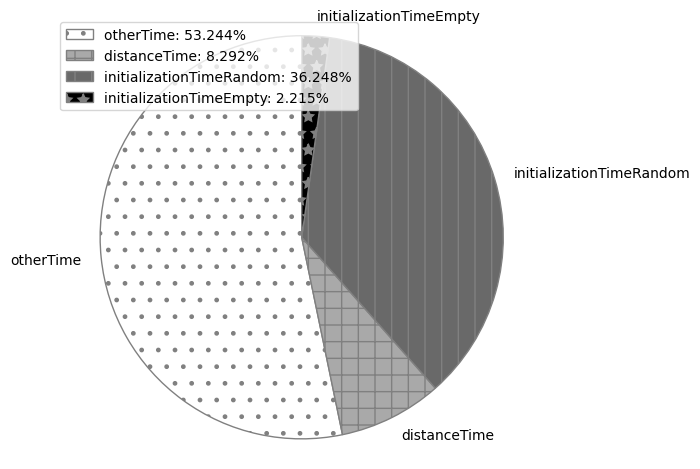

In [9]:
sizes = df_sequential[['otherTime', 'distanceTime', 'initializationTimeRandom', 'initializationTimeEmpty']].iloc[0].values

# Normalize sizes in 0-100
sizes = sizes / sizes.sum() * 100
labels=['otherTime', 'distanceTime', 'initializationTimeRandom', 'initializationTimeEmpty']
colors = ['white', 'darkgray', 'dimgray', 'black']

# Create a pie chart with textures
fig, ax = plt.subplots()
wedges, _ = ax.pie(sizes, labels=labels, colors=colors, wedgeprops={'edgecolor': 'gray'}, startangle=90)

# Define hatch patterns for each wedge
hatch_patterns = ['.', '+', '|', '*']
for wedge, pattern in zip(wedges, hatch_patterns):
    wedge.set_hatch(pattern)

handles, _ = plt.gca().get_legend_handles_labels()
legend_labels = [f'{label}: {size:.3f}%' for label, size in zip(labels, sizes)]

plt.legend(legend_labels, loc="upper left")
plt.axis('equal')
plt.tight_layout()
plt.show()

Internal times in evolutionTime

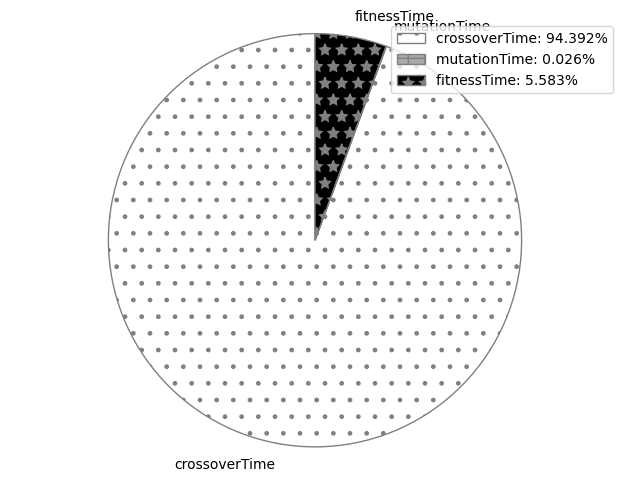

In [10]:
sizes = df_sequential[['crossoverTime', 'mutationTime', 'fitnessTime']].iloc[0].values

# Normalize sizes in 0-100
sizes = sizes / sizes.sum() * 100
labels=['crossoverTime', 'mutationTime', 'fitnessTime']
colors = ['white', 'darkgray', 'black']


# Create a pie chart with textures
fig, ax = plt.subplots()
wedges, _ = ax.pie(sizes, labels=labels, colors=colors, wedgeprops={'edgecolor': 'gray'}, startangle=90)

# Define hatch patterns for each wedge
hatch_patterns = ['.', '+', '*']
for wedge, pattern in zip(wedges, hatch_patterns):
    wedge.set_hatch(pattern)

handles, _ = plt.gca().get_legend_handles_labels()
legend_labels = [f'{label}: {size:.3f}%' for label, size in zip(labels, sizes)]
plt.legend(legend_labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

# Parallelization total time analysis

In [11]:
df_threads = pd.read_csv('results/threads_results.csv')
df_threads.head()

,numWorkers,maxFitness,totalTime,distanceTime,initializationTimeRandom,initializationTimeEmpty,evolutionTime,crossoverTime,mutationTime,fitnessTime
0,1,0.000001,290754901,21428,91902,5909,290500128,0,0,0
1,2,0.000002,153396640,10806,163403,3201,153083849,0,0,0
2,4,0.000002,90538592,5497,205151,2185,90189453,0,0,0
3,6,0.000002,76515326,5771,299407,1958,76071047,0,0,0
4,8,0.000001,82299140,4845,504042,2197,81651922,0,0,0


In [12]:
df_ff = pd.read_csv('results/ff_results.csv')
df_ff.head()

,numWorkers,maxFitness,totalTime,distanceTime,initializationTimeRandom,initializationTimeEmpty,evolutionTime,crossoverTime,mutationTime,fitnessTime
0,1,0,291249188,20500,173875,5944,290831471,0,0,0
1,2,0,186097143,10839,196483,3421,185669284,0,0,0
2,4,0,111633129,5692,509684,1561,110897112,0,0,0
3,6,0,96127138,3693,607799,1173,95292024,0,0,0
4,8,0,89923336,2920,629492,1010,89068296,0,0,0


In [13]:
num_workers_list = df_threads['numWorkers'].values

In [14]:
total_times_threads = df_threads['totalTime'].iloc[0:17]
total_times_ff = df_ff['totalTime'].iloc[0:17]

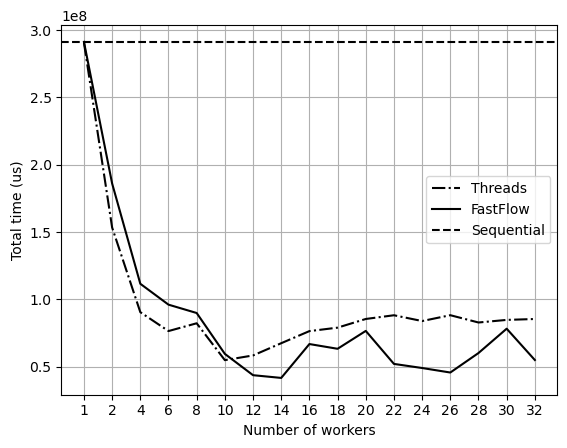

In [15]:
plt.plot(total_times_threads, label='Threads', linestyle='dashdot', color='black')
plt.plot(total_times_ff, label='FastFlow', color='black')
plt.axhline(y=df_sequential['totalTime'].iloc[1], color='black', label='Sequential', linestyle='dashed')
plt.legend()
plt.xlabel('Number of workers')
plt.ylabel('Total time (us)')
plt.xticks(ticks=[i for i in range(len(num_workers_list))], labels=num_workers_list)
plt.grid(True)

plt.show()

### Speedup

In [16]:
df_threads['speedup'] = df_sequential['totalTime'].iloc[1] / df_threads['totalTime']
df_ff['speedup'] = df_sequential['totalTime'].iloc[1] / df_ff['totalTime']

In [17]:
ideal_times = [df_sequential['totalTime'].iloc[1]/i for i in num_workers_list]
ideal_speedup = [i for i in num_workers_list]
print(ideal_speedup)

[1, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32]


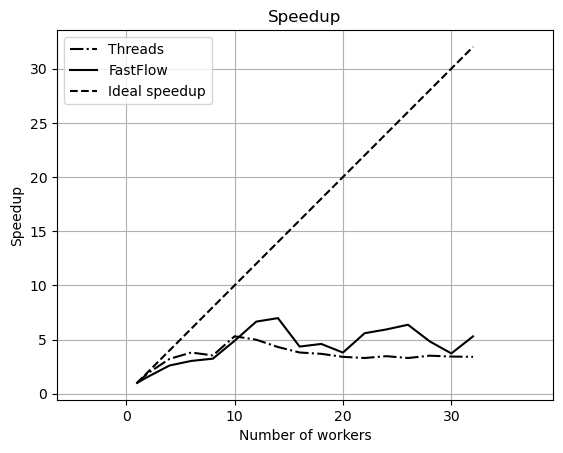

In [18]:
plt.plot(num_workers_list, df_threads['speedup'].iloc[0:17], label='Threads', linestyle='dashdot', color='black')
plt.plot(num_workers_list, df_ff['speedup'].iloc[0:17], label='FastFlow', color='black')
plt.plot(num_workers_list, ideal_speedup, linestyle='dashed', label='Ideal speedup', color='black')
plt.legend()
plt.xlabel('Number of workers')
plt.ylabel('Speedup')
plt.axis('equal')

plt.rcParams["figure.figsize"] = (8, 8)
plt.title("Speedup")
plt.grid(True)
plt.show()

In [19]:
print(df_threads[['numWorkers', 'speedup']])

    numWorkers   speedup
0            1  1.001242
1            2  1.897799
2            4  3.215380
3            6  3.804676
4            8  3.537291
5           10  5.301169
6           12  4.984676
7           14  4.313173
8           16  3.806569
9           18  3.682768
10          20  3.405272
11          22  3.298590
12          24  3.467625
13          26  3.297098
14          28  3.512746
15          30  3.432842
16          32  3.406076


### Scalability

In [20]:
df_threads['scalability'] = df_threads['totalTime'].iloc[0] / df_threads['totalTime']
df_ff['scalability'] = df_ff['totalTime'].iloc[0] / df_ff['totalTime']

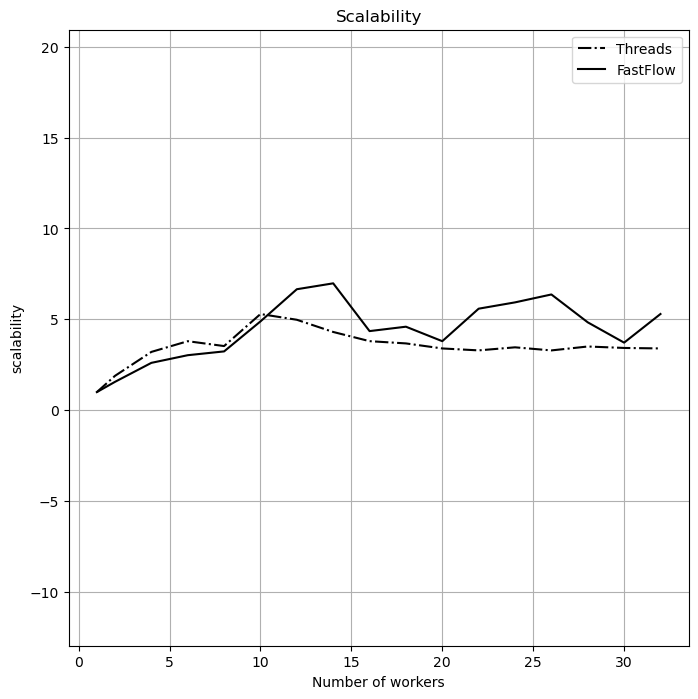

In [21]:
plt.plot(num_workers_list, df_threads['scalability'].iloc[0:17], label='Threads', linestyle='dashdot', color='black')
plt.plot(num_workers_list, df_ff['scalability'].iloc[0:17], label='FastFlow', color='black')
plt.legend()
plt.xlabel('Number of workers')
plt.ylabel('scalability')
plt.axis('equal')

# set plot size
plt.rcParams["figure.figsize"] = (8, 4)
plt.title("Scalability")
plt.grid(True)
plt.show()

### Efficiency

In [22]:
df_threads['efficiency'] = df_threads['speedup'] / df_threads['numWorkers']
df_ff['efficiency'] = df_ff['speedup'] / df_ff['numWorkers']

In [23]:
# print efficiency and numworkers
print("numWorkers, efficiency")
print(df_ff[["numWorkers", "efficiency"]])

numWorkers, efficiency
    numWorkers  efficiency
0            1    0.999543
1            2    0.782161
2            4    0.651948
3            6    0.504741
4            8    0.404673
5           10    0.488721
6           12    0.554597
7           14    0.498517
8           16    0.272099
9           18    0.255294
10          20    0.189956
11          22    0.253905
12          24    0.247186
13          26    0.244901
14          28    0.172696
15          30    0.123978
16          32    0.165417


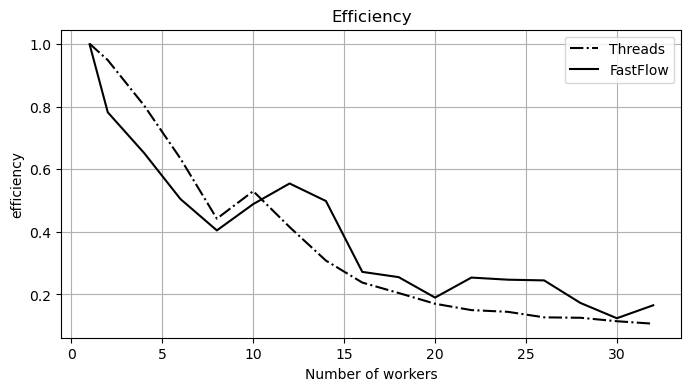

In [24]:
plt.plot(num_workers_list, df_threads['efficiency'].iloc[0:17], label='Threads', linestyle='dashdot', color='black')
plt.plot(num_workers_list, df_ff['efficiency'].iloc[0:17], label='FastFlow', color='black')
plt.legend()
plt.xlabel('Number of workers')
plt.ylabel('efficiency')

# set plot size
plt.rcParams["figure.figsize"] = (8, 4)
plt.title("Efficiency")
plt.grid(True)
plt.show()

## Phases plots

### Times

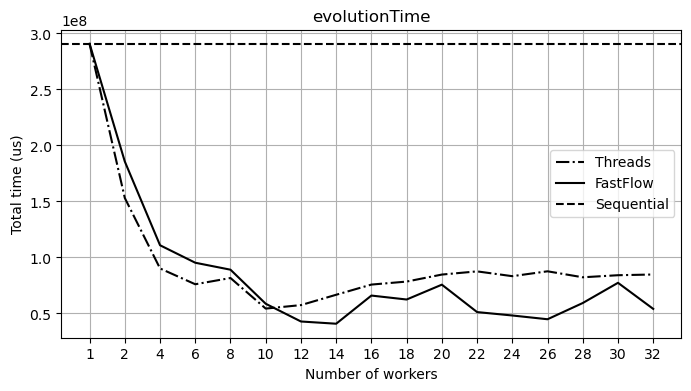

In [59]:
distance_times_threads = df_threads['evolutionTime'].iloc[0:17]
distance_times_ff = df_ff['evolutionTime'].iloc[0:17]

plt.plot(distance_times_threads, label='Threads', linestyle='dashdot', color='black')
plt.plot(distance_times_ff, label='FastFlow', color='black')
plt.axhline(y=df_sequential['evolutionTime'].iloc[1], color='black', label='Sequential', linestyle='dashed')
plt.legend()
plt.xlabel('Number of workers')
plt.ylabel('Total time (us)')
plt.xticks(ticks=[i for i in range(len(num_workers_list))], labels=num_workers_list)
plt.grid(True)
plt.title('evolutionTime')
plt.show()

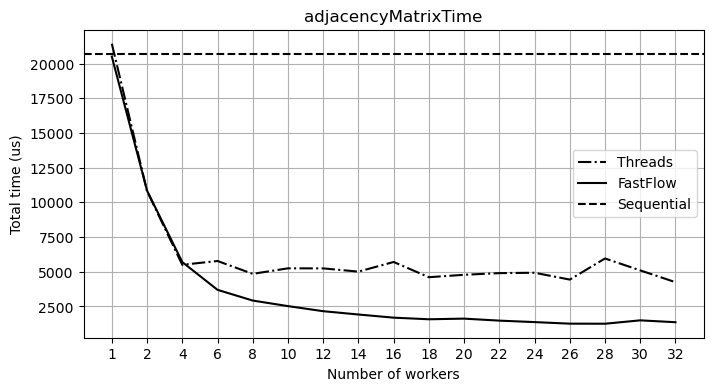

In [29]:
distance_times_threads = df_threads['distanceTime'].iloc[0:17]
distance_times_ff = df_ff['distanceTime'].iloc[0:17]

plt.plot(distance_times_threads, label='Threads', linestyle='dashdot', color='black')
plt.plot(distance_times_ff, label='FastFlow', color='black')
plt.axhline(y=df_sequential['distanceTime'].iloc[1], color='black', label='Sequential', linestyle='dashed')
plt.legend()
plt.xlabel('Number of workers')
plt.ylabel('Total time (us)')
plt.xticks(ticks=[i for i in range(len(num_workers_list))], labels=num_workers_list)
plt.grid(True)
plt.title('adjacencyMatrixTime')
plt.show()

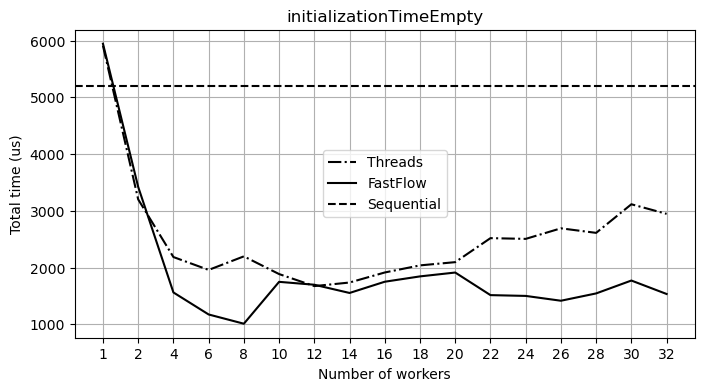

In [30]:
times_threads = df_threads['initializationTimeEmpty'].iloc[0:17]
times_ff = df_ff['initializationTimeEmpty'].iloc[0:17]

plt.plot(times_threads, label='Threads', linestyle='dashdot', color='black')
plt.plot(times_ff, label='FastFlow', color='black')
plt.axhline(y=df_sequential['initializationTimeEmpty'].iloc[1], color='black', label='Sequential', linestyle='dashed')
plt.legend()
plt.xlabel('Number of workers')
plt.ylabel('Total time (us)')
plt.xticks(ticks=[i for i in range(len(num_workers_list))], labels=num_workers_list)
plt.grid(True)
plt.title('initializationTimeEmpty')
plt.show()

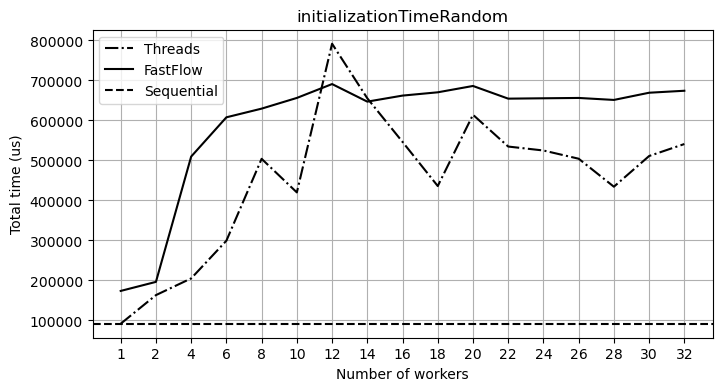

In [60]:
times_threads = df_threads['initializationTimeRandom'].iloc[0:17]
times_ff = df_ff['initializationTimeRandom'].iloc[0:17]

plt.plot(times_threads, label='Threads', linestyle='dashdot', color='black')
plt.plot(times_ff, label='FastFlow', color='black')
plt.axhline(y=df_sequential['initializationTimeRandom'].iloc[1], color='black', label='Sequential', linestyle='dashed')
plt.legend()
plt.xlabel('Number of workers')
plt.ylabel('Total time (us)')
plt.xticks(ticks=[i for i in range(len(num_workers_list))], labels=num_workers_list)
plt.grid(True)
plt.title('initializationTimeRandom')
plt.show()

### Speedup

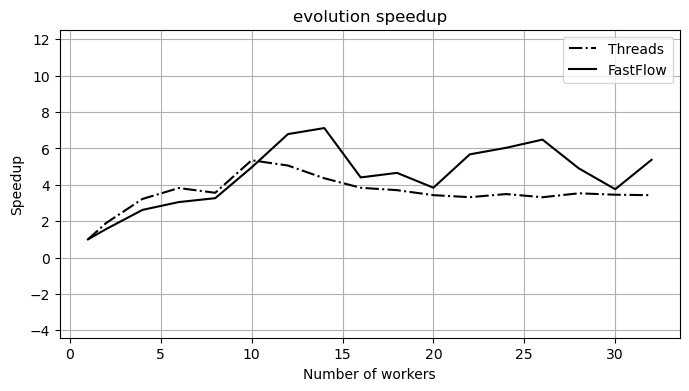

In [67]:
speedup_threads = df_sequential['evolutionTime'].iloc[1] / df_threads['evolutionTime']
speedup_ff = df_sequential['evolutionTime'].iloc[1] / df_ff['evolutionTime']
plt.plot(num_workers_list, speedup_threads.iloc[0:17], label='Threads', linestyle='dashdot', color='black')
plt.plot(num_workers_list, speedup_ff.iloc[0:17], label='FastFlow', color='black')
plt.legend()
plt.xlabel('Number of workers')
plt.ylabel('Speedup')
plt.axis('equal')

plt.rcParams["figure.figsize"] = (8, 2)
plt.title("evolution speedup")
plt.grid(True)
plt.show()

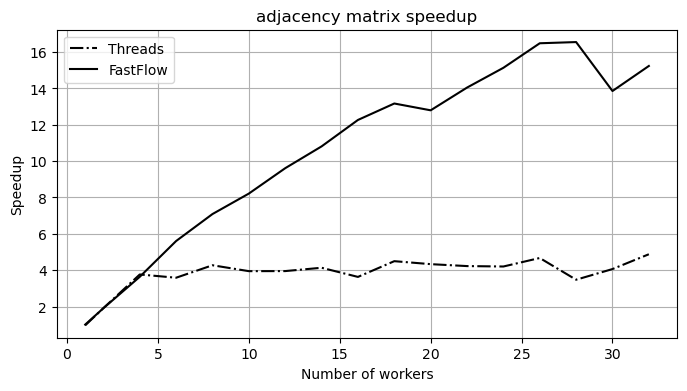

In [71]:
speedup_threads = df_sequential['distanceTime'].iloc[1] / df_threads['distanceTime']
speedup_ff = df_sequential['distanceTime'].iloc[1] / df_ff['distanceTime']
plt.plot(num_workers_list, speedup_threads.iloc[0:17], label='Threads', linestyle='dashdot', color='black')
plt.plot(num_workers_list, speedup_ff.iloc[0:17], label='FastFlow', color='black')
plt.legend()
plt.xlabel('Number of workers')
plt.ylabel('Speedup')
plt.axis('equal')

plt.rcParams["figure.figsize"] = (8, 5)
plt.title("adjacency matrix speedup")
plt.grid(True)
plt.show()

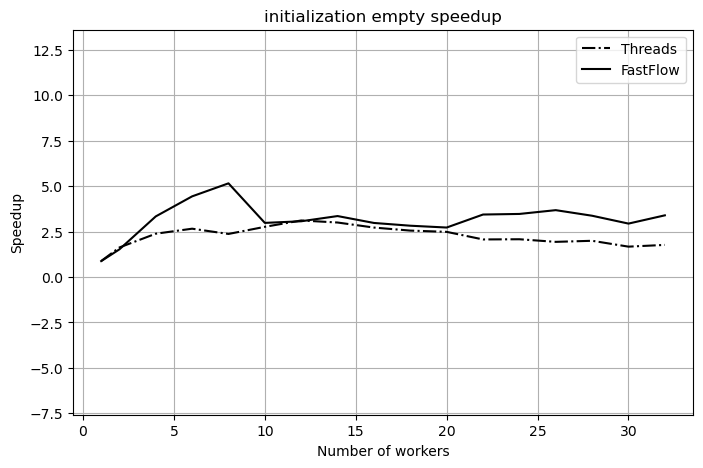

In [72]:
speedup_threads = df_sequential['initializationTimeEmpty'].iloc[1] / df_threads['initializationTimeEmpty']
speedup_ff = df_sequential['initializationTimeEmpty'].iloc[1] / df_ff['initializationTimeEmpty']
plt.plot(num_workers_list, speedup_threads.iloc[0:17], label='Threads', linestyle='dashdot', color='black')
plt.plot(num_workers_list, speedup_ff.iloc[0:17], label='FastFlow', color='black')
plt.legend()
plt.xlabel('Number of workers')
plt.ylabel('Speedup')
plt.axis('equal')

plt.rcParams["figure.figsize"] = (8, 4)
plt.title("initialization empty speedup")
plt.grid(True)
plt.show()

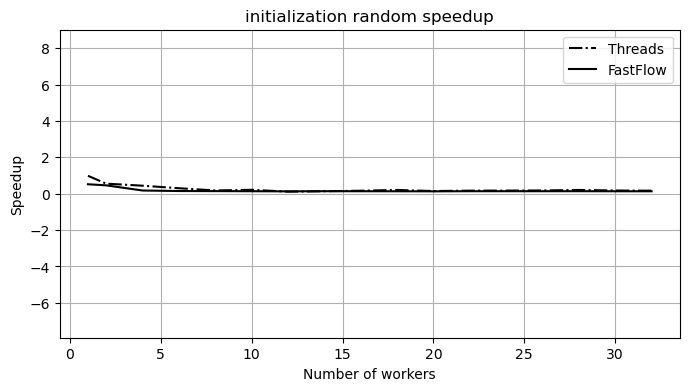

In [70]:
speedup_threads = df_sequential['initializationTimeRandom'].iloc[1] / df_threads['initializationTimeRandom']
speedup_ff = df_sequential['initializationTimeRandom'].iloc[1] / df_ff['initializationTimeRandom']
plt.plot(num_workers_list, speedup_threads.iloc[0:17], label='Threads', linestyle='dashdot', color='black')
plt.plot(num_workers_list, speedup_ff.iloc[0:17], label='FastFlow', color='black')
plt.legend()
plt.xlabel('Number of workers')
plt.ylabel('Speedup')
plt.axis('equal')

plt.rcParams["figure.figsize"] = (8, 4)
plt.title("initialization random speedup")
plt.grid(True)
plt.show()